# Explore Synthetic Telco Churn + Support Conversations Data

Цей ноутбук показує:
- базовий огляд табличних даних клієнтів
- візуалізацію concept/data drift (зміна churn rate та розподілів у часі)
- аналіз згенерованих support conversations
- зв'язок між типами скарг та churn

Дані знаходяться в директорії `../data/`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

DATA_DIR = "../data/"

## 1. Завантаження даних

In [2]:
df_customers = pd.read_csv(DATA_DIR + "telco_customers.csv")
df_customers["RecordDate"] = pd.to_datetime(df_customers["RecordDate"])

df_conversations = pd.read_csv(DATA_DIR + "support_conversations.csv")
df_conversations["RecordDate"] = pd.to_datetime(df_conversations["RecordDate"])

df_kb = pd.read_csv(DATA_DIR + "knowledge_base.csv")

print("Клієнти:          ", df_customers.shape)
print("Розмови support:  ", df_conversations.shape)
print("Knowledge base:   ", df_kb.shape)

Клієнти:           (50000, 22)
Розмови support:   (3000, 5)
Knowledge base:    (8, 3)


## 2. Огляд табличних даних клієнтів

In [3]:
df_customers.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RecordDate
0,5817-YYUTM,Male,0,No,No,32,Yes,No,DSL,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),92.32,2891.80,Yes,2023-01-01
1,5670-CZKES,Male,0,Yes,Yes,15,Yes,No,DSL,No,...,No,Yes,No,Month-to-month,No,Electronic check,123.84,1907.83,Yes,2023-01-01
2,9997-PULJX,Male,1,No,No,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,46.38,2073.59,Yes,2023-01-01


In [4]:
df_customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        50000 non-null  str           
 1   gender            50000 non-null  str           
 2   SeniorCitizen     50000 non-null  int64         
 3   Partner           50000 non-null  str           
 4   Dependents        50000 non-null  str           
 5   tenure            50000 non-null  int64         
 6   PhoneService      50000 non-null  str           
 7   MultipleLines     50000 non-null  str           
 8   InternetService   50000 non-null  str           
 9   OnlineSecurity    50000 non-null  str           
 10  OnlineBackup      50000 non-null  str           
 11  DeviceProtection  50000 non-null  str           
 12  TechSupport       50000 non-null  str           
 13  StreamingTV       50000 non-null  str           
 14  StreamingMovies   50000 non-null 

In [5]:
df_customers.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RecordDate
count,50000,50000,50000.000000,50000,50000,50000.000000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000,50000
unique,50000,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,2,4,NaN,NaN,2,NaN
top,5817-YYUTM,Male,NaN,Yes,No,NaN,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),NaN,NaN,Yes,NaN
freq,1,25012,NaN,28574,37483,NaN,46070,23070,26040,22230,...,24869,30759,30842,21248,33236,14071,NaN,NaN,29332,NaN
mean,NaN,NaN,0.122240,NaN,NaN,33.745260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,131.274456,4457.653485,NaN,2024-01-01 09:21:11.808000
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.500000,0.000000,NaN,2023-01-01 00:00:00
25%,NaN,NaN,0.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,111.207500,2297.262500,NaN,2023-07-02 00:00:00
50%,NaN,NaN,0.000000,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,141.600000,4155.330000,NaN,2024-01-01 00:00:00
75%,NaN,NaN,0.000000,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,164.380000,6267.185000,NaN,2024-07-02 00:00:00
max,NaN,NaN,1.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.970000,15190.070000,NaN,2024-12-31 00:00:00


## 3. Аналіз churn drift у часі

Churn rate по роках:
 Churn     No    Yes
Year               
2023   0.333  0.667
2024   0.494  0.506


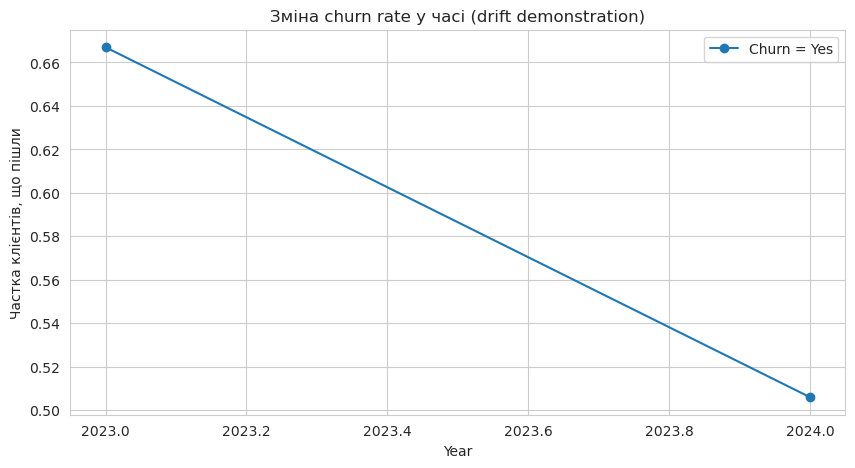

In [6]:
df_customers["Year"] = df_customers["RecordDate"].dt.year
df_customers["Month"] = df_customers["RecordDate"].dt.to_period("M")

churn_by_year = df_customers.groupby("Year")["Churn"].value_counts(normalize=True).unstack().round(3)
print("Churn rate по роках:\n", churn_by_year)

plt.figure(figsize=(10, 5))
churn_by_year["Yes"].plot(marker="o", label="Churn = Yes")
plt.title("Зміна churn rate у часі (drift demonstration)")
plt.ylabel("Частка клієнтів, що пішли")
plt.grid(True)
plt.legend()
plt.show()

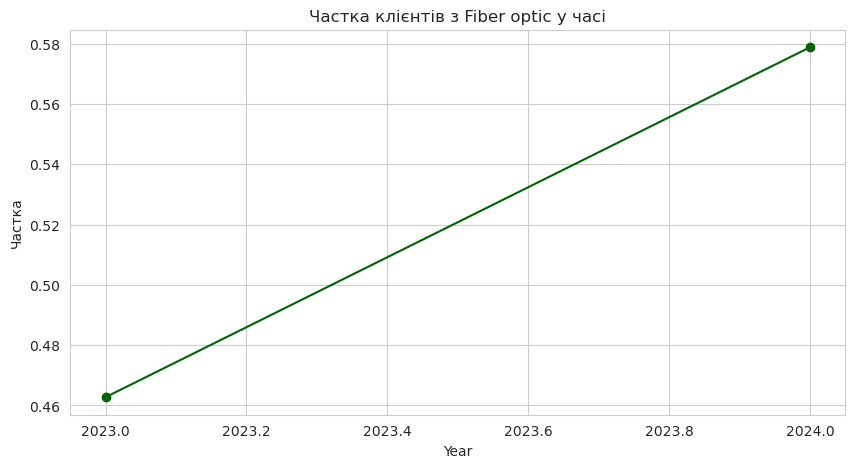

In [7]:
# Динаміка Fiber optic adoption
fiber_by_year = df_customers.groupby("Year")["InternetService"].value_counts(normalize=True).unstack().get("Fiber optic", pd.Series())

plt.figure(figsize=(10, 5))
fiber_by_year.plot(marker="o", color="darkgreen")
plt.title("Частка клієнтів з Fiber optic у часі")
plt.ylabel("Частка")
plt.grid(True)
plt.show()

## 4. Аналіз support conversations

Розподіл типів проблем:
issue_type
want_to_cancel        21.2
billing_high          20.5
service_outage        20.0
contract_confusion    19.3
service_slow          19.0
Name: proportion, dtype: float64 %


/tmp/ipykernel_1844/3588304840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_conversations, x="issue_type", order=df_conversations["issue_type"].value_counts().index, palette="Set2")


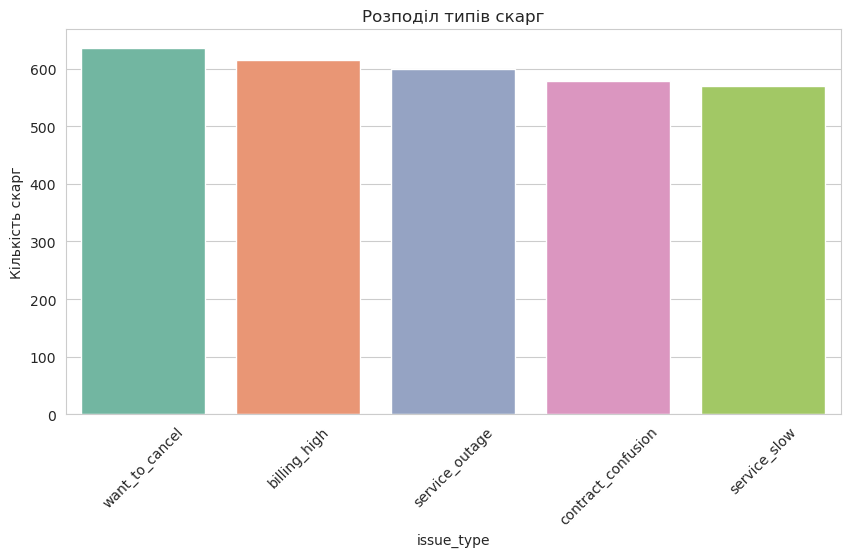

In [8]:
print("Розподіл типів проблем:")
print(df_conversations["issue_type"].value_counts(normalize=True).round(3) * 100, "%")

plt.figure(figsize=(10, 5))
sns.countplot(data=df_conversations, x="issue_type", order=df_conversations["issue_type"].value_counts().index, palette="Set2")
plt.title("Розподіл типів скарг")
plt.xticks(rotation=45)
plt.ylabel("Кількість скарг")
plt.show()

In [11]:
print("Приклади розмов (випадкові):")
for _ in range(3):
    row = df_conversations.sample(1).iloc[0]
    print(f"\nТип: {row['issue_type'].upper()}")
    print(f"Скарга:   {row['complaint']}")
    print(f"Відповідь: {row['resolution']}")
    print("─" * 80)

Приклади розмов (випадкові):

Тип: CONTRACT_CONFUSION
Скарга:   The contract terms on my account don't match what I agreed to. Can you review?
Відповідь: I've adjusted your plan to match the original agreement. No early termination fee will apply.
────────────────────────────────────────────────────────────────────────────────

Тип: SERVICE_SLOW
Скарга:   I can't work from home because the internet is so slow. When will this be fixed?
Відповідь: I see there's network congestion in your area. We're upgrading infrastructure. I've applied a $10 credit for the inconvenience.
────────────────────────────────────────────────────────────────────────────────

Тип: SERVICE_OUTAGE
Скарга:   My No has been down since last night. I need this fixed ASAP as I work from home.
Відповідь: The outage was caused by scheduled upgrade. Service is now restored. I've applied a $25 credit to your next bill.
────────────────────────────────────────────────────────────────────────────────


## 5. Зв'язок між типом скарги та churn

Churn rate за типом скарги:
Churn                  No    Yes
issue_type                      
billing_high        0.460  0.540
contract_confusion  0.385  0.615
service_outage      0.402  0.598
service_slow        0.416  0.584
want_to_cancel      0.392  0.608


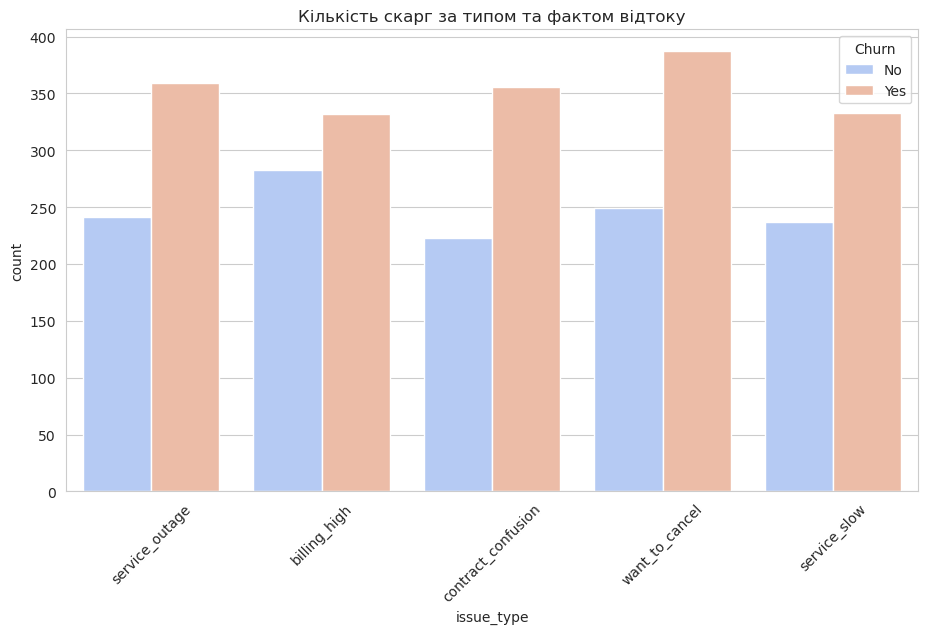

In [12]:
merged = df_conversations.merge(
    df_customers[["customerID", "Churn", "MonthlyCharges", "Contract", "InternetService"]],
    on="customerID",
    how="left"
)

print("Churn rate за типом скарги:")
print(merged.groupby("issue_type")["Churn"].value_counts(normalize=True).unstack().round(3))

plt.figure(figsize=(11, 6))
sns.countplot(data=merged, x="issue_type", hue="Churn", palette="coolwarm")
plt.title("Кількість скарг за типом та фактом відтоку")
plt.xticks(rotation=45)
plt.show()

## 6. Knowledge Base (для RAG / чат-агента)

In [13]:
print("Knowledge Base документи:")
display(df_kb)

Knowledge Base документи:


,id,title,content
0,1,How to reset your modem,1. Unplug the power cord from the modem. 2. Wa...
1,2,Understanding your bill,"Your monthly bill includes: base plan charge, ..."
2,3,Upgrading to Fiber optic,Fiber offers speeds up to 1 Gbps. Availability...
3,4,How to change payment method,Log in → My Account → Billing & Payments → Upd...
4,5,Troubleshooting slow internet,1. Restart modem/router. 2. Connect via Ethern...
5,6,Contract terms and cancellation,Month-to-month: cancel anytime. One/Two year: ...
6,7,Adding streaming services,"You can add HBO, Netflix bundle, etc. in My Se..."
7,8,Technical support hours,24/7 phone support. Chat available Mon–Fri 8 A...


Готово! Дані можна використовувати для:
- тренування churn-прогнозу
- fine-tuning / RAG для чат-агента
- демонстрації data & concept drift